In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Insights.csv')

In [3]:
data.fillna(0,inplace=True)

In [4]:
data

,Date,HS Code,Product,Specific Product,Port of Origin,Country of Destination,Port of Destination,Value(USD),Std Qty,Std Unit,Std Unit Price(USD),Qty,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Invoice Value INR
0,31-Jan-20,42022110,LADIES LEATHER HAND BAG 100% COW LEATHER SAC C...,Leather,JNPT,France,Le Havre,1543.70,86.0,NOS,17.95,86.0,PCS,1543.7,17.95,USD,107981.82,Sea,0.0
1,31-Jan-20,42022110,BAG,Leather,JNPT,Japan,Kobe,3074.75,710.0,NOS,4.33,710.0,PCS,3074.3,4.33,USD,215078.96,Sea,0.0
2,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2167,Leather,JNPT,Spain,Algeciras,2487.49,100.0,NOS,24.87,100.0,PCS,2365.0,23.65,EUR,174000.00,Sea,0.0
3,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2213,Leather,JNPT,Spain,Algeciras,1529.66,100.0,NOS,15.30,100.0,PCS,1450.0,14.50,EUR,107000.00,Sea,0.0
4,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.1132,Leather,JNPT,Spain,Algeciras,2558.97,70.0,NOS,36.56,70.0,PCS,2436.0,34.80,EUR,179000.00,Sea,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,24-Oct-19,42022220,COTTON CLUTCH BAGS(80% COTTON 10% GLASS BEAD 1...,Cotton,JNPT,Mauritius,Louis,117.00,18.0,NOS,6.50,18.0,PCS,117.0,6.50,USD,8260.21,Sea,0.0
4969,24-Oct-19,42022220,COTTON CLUTCH BAGS(80% COTTON 10% GLASS BEAD 1...,Cotton,JNPT,Mauritius,Louis,78.00,12.0,NOS,6.50,12.0,PCS,114.0,9.50,USD,5506.82,Sea,0.0
4970,24-Oct-19,42022220,COTTON TABLET BAGS(80%COTTON 10%ACCORD 1 0%GLA...,Cotton,JNPT,Mauritius,Louis,90.00,12.0,NOS,7.50,12.0,PCS,114.0,9.50,USD,6354.00,Sea,0.0
4971,24-Oct-19,42022220,100% COTTON P/L BLOCK PRINTED BAG,Cotton,JNPT,Denmark,Aarhus,8792.80,3032.0,NOS,2.90,3032.0,PCS,8792.8,2.90,USD,620771.84,Sea,0.0


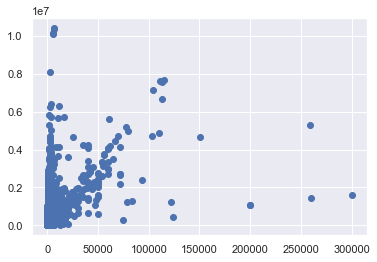

In [5]:
plt.scatter(data['Qty'],data['Value(INR)'])
# plt.xlim(-180,180)
# plt.ylim(-90,90)
plt.show()

In [6]:
x = data.iloc[:,11:17]
x = x.drop(['Unit',"Value In FC","Unit Rate In FC","Unit Rate Currency"],axis=1)
x

,Qty,Value(INR)
0,86.0,107981.82
1,710.0,215078.96
2,100.0,174000.00
3,100.0,107000.00
4,70.0,179000.00
...,...,...
4968,18.0,8260.21
4969,12.0,5506.82
4970,12.0,6354.00
4971,3032.0,620771.84


In [7]:
 from sklearn.cluster import KMeans
kmeans = KMeans(5)
kmeans.fit(x.astype(np.float32))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([4, 4, 4, ..., 4, 0, 4])

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Date,HS Code,Product,Specific Product,Port of Origin,Country of Destination,Port of Destination,Value(USD),Std Qty,Std Unit,Std Unit Price(USD),Qty,Unit,Value In FC,Unit Rate In FC,Unit Rate Currency,Value(INR),Shipment Mode,Invoice Value INR,Cluster
0,31-Jan-20,42022110,LADIES LEATHER HAND BAG 100% COW LEATHER SAC C...,Leather,JNPT,France,Le Havre,1543.70,86.0,NOS,17.95,86.0,PCS,1543.7,17.95,USD,107981.82,Sea,0.0,4
1,31-Jan-20,42022110,BAG,Leather,JNPT,Japan,Kobe,3074.75,710.0,NOS,4.33,710.0,PCS,3074.3,4.33,USD,215078.96,Sea,0.0,4
2,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2167,Leather,JNPT,Spain,Algeciras,2487.49,100.0,NOS,24.87,100.0,PCS,2365.0,23.65,EUR,174000.00,Sea,0.0,4
3,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.2213,Leather,JNPT,Spain,Algeciras,1529.66,100.0,NOS,15.30,100.0,PCS,1450.0,14.50,EUR,107000.00,Sea,0.0,4
4,28-Jan-20,42022110,COW NAPPA LEATHER HAND BAG ORDER NO.1132,Leather,JNPT,Spain,Algeciras,2558.97,70.0,NOS,36.56,70.0,PCS,2436.0,34.80,EUR,179000.00,Sea,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,24-Oct-19,42022220,COTTON CLUTCH BAGS(80% COTTON 10% GLASS BEAD 1...,Cotton,JNPT,Mauritius,Louis,117.00,18.0,NOS,6.50,18.0,PCS,117.0,6.50,USD,8260.21,Sea,0.0,4
4969,24-Oct-19,42022220,COTTON CLUTCH BAGS(80% COTTON 10% GLASS BEAD 1...,Cotton,JNPT,Mauritius,Louis,78.00,12.0,NOS,6.50,12.0,PCS,114.0,9.50,USD,5506.82,Sea,0.0,4
4970,24-Oct-19,42022220,COTTON TABLET BAGS(80%COTTON 10%ACCORD 1 0%GLA...,Cotton,JNPT,Mauritius,Louis,90.00,12.0,NOS,7.50,12.0,PCS,114.0,9.50,USD,6354.00,Sea,0.0,4
4971,24-Oct-19,42022220,100% COTTON P/L BLOCK PRINTED BAG,Cotton,JNPT,Denmark,Aarhus,8792.80,3032.0,NOS,2.90,3032.0,PCS,8792.8,2.90,USD,620771.84,Sea,0.0,0


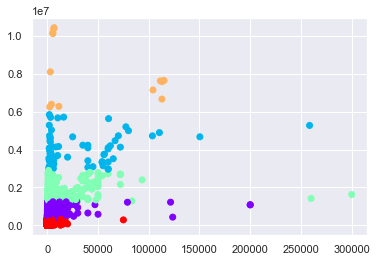

In [11]:
plt.scatter(data_with_clusters['Qty'],data_with_clusters['Value(INR)'],c=data_with_clusters['Cluster'],cmap='rainbow')
# plt.xlim(-180,180)
# plt.ylim(-90,90)
plt.show()

In [12]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[2714323618788958.0,
 975729144616755.6,
 515928114393570.4,
 304894126695906.8,
 201838026044626.0,
 133706195188819.53,
 102889831683095.86,
 76442164237314.22,
 58491216347088.09]

Text(0, 0.5, 'Within-cluster Sum of Squares')

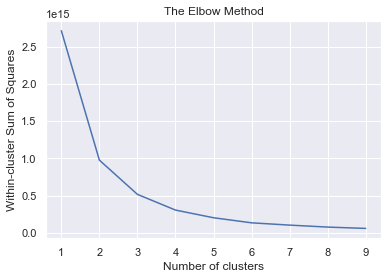

In [13]:
number_cluster = range(1,10)
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')